In [1]:
%matplotlib inline

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [3]:
import datetime as dt

import numpy as np
import matplotlib.pyplot as plt

import tsa.processes as proc
import tsa.random as rnd
import tsa.simulation as sim

In [4]:
rnd.randomstate(np.random.RandomState(seed=42), force=True);

In [5]:
W = proc.WienerProcess.create2d(mean1=.25, mean2=.5, sd1=3., sd2=4., cor=.5)
em = sim.EulerMaruyama(process=W)

In [6]:
df = sim.run(em, 100)

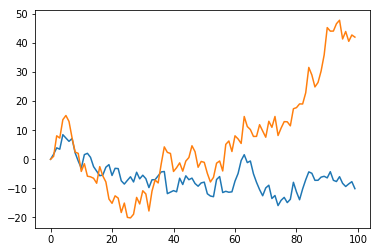

In [7]:
plt.plot(df);

In [8]:
df[0:10]

,0,1
0.0,0.000000,0.000000
1.0,1.740142,1.014467
2.0,3.933208,8.085774
3.0,3.480748,7.306393
4.0,8.468386,13.623291
5.0,7.309963,15.063825
6.0,6.169710,13.023654
7.0,7.145597,7.379782
8.0,2.220843,2.482125
9.0,-0.567650,2.045047


In [9]:
next(em)

(100.0, array([[ -9.66927644],
        [ 38.67282795]]))

In [10]:
ts, vs = [], []
for t, v in em:
    ts.append(t); vs.append(v)
    if t == 110: break
ts, vs

([101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0],
 [array([[ -8.34591436],
         [ 41.83101725]]), array([[ -4.84676063],
         [ 48.14759713]]), array([[ -8.72976873],
         [ 42.64353716]]), array([[ -6.93466293],
         [ 45.95341443]]), array([[ -5.13951987],
         [ 60.82976319]]), array([[ -3.17684834],
         [ 66.40525898]]), array([[ -6.48430467e-02],
         [  7.10697480e+01]]), array([[ -0.76065078],
         [ 73.568356  ]]), array([[ -2.82912642],
         [ 71.70234186]]), array([[ -4.03521707],
         [ 71.5152351 ]])])

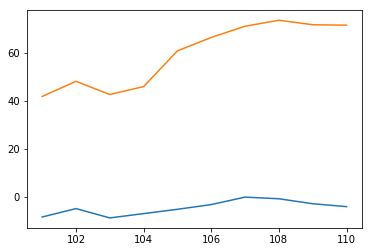

In [11]:
plt.plot(ts, np.hstack(vs).T);

In [12]:
ts, vs = [], []
for t, v in em:
    ts.append(t); vs.append(v.flatten())
    if t == 120: break
ts, vs

([111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0],
 [array([  3.15875863,  70.17615586]),
  array([  5.4675392 ,  66.46206459]),
  array([  4.30174361,  69.79043638]),
  array([  4.74458366,  66.68557899]),
  array([  2.84867254,  68.10916723]),
  array([  0.90757264,  67.89826852]),
  array([  1.29428816,  66.23220238]),
  array([  7.97612043,  73.21605047]),
  array([  2.15069267,  70.31166199]),
  array([  0.41533327,  72.44100475])])

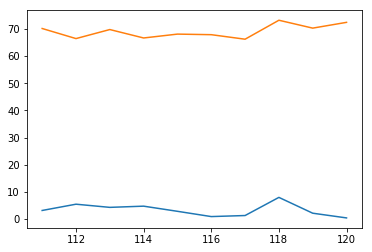

In [13]:
plt.plot(ts, vs);

In [14]:
ts = sim.xtimes(dt.datetime(2017, 5, 1), dt.datetime(2017, 6, 1), dt.timedelta(hours=12))
em = sim.EulerMaruyama(process=W, times=ts, timeunit=dt.timedelta(days=1.), flatten=True)
next(em)

(datetime.datetime(2017, 5, 1, 0, 0), array([ 0.,  0.]))

In [15]:
next(em)

(datetime.datetime(2017, 5, 1, 12, 0), array([-1.55619037, -1.15183931]))

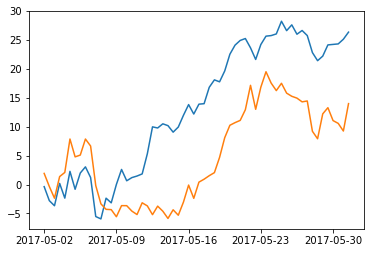

In [16]:
ts, vs = [], []
for t, v in em:
    ts.append(t); vs.append(v)
plt.plot(ts, vs);

In [17]:
X = proc.OrnsteinUhlenbeckProcess(transition=1., vol=1.)

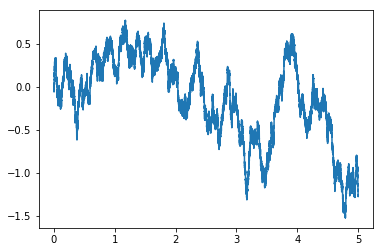

In [18]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=1E-5))
df = sim.run(em)
plt.plot(df);

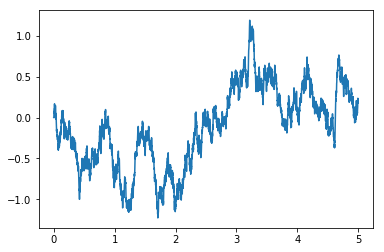

In [19]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=1E-3))
df = sim.run(em)
plt.plot(df);

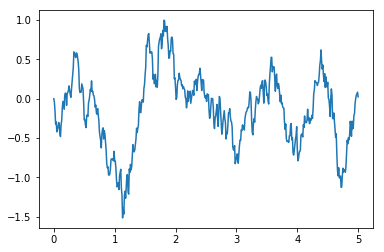

In [20]:
em = sim.EulerMaruyama(process=X, times=sim.xtimes(start=0., stop=5., step=1E-2))
df = sim.run(em)
plt.plot(df);